## Random-Forest


In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

### Pre-Processing to remove unnecessary columns and restricting the values to analyzable ranges.

In [29]:
capture_34_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-34-1/conn.log.labeled"
capture_44_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-44-1/conn.log.labeled"
capture_42_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-42-1/conn.log.labeled"
capture_21_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-21-1/conn.log.labeled"
capture_20_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-20-1/conn.log"
capture_49_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-49-1/conn.log.labeled"
capture_60_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-60-1/conn.log.labeled"
capture_36_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-36-1/conn.log.labeled"
capture_8_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-8-1/conn.log"
capture_35_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-35-1/conn.log.labeled"
capture_48_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-48-1/conn.log"
capture_1_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-1-1/conn.log.labeled"
capture_3_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-3-1/conn.log.labeled"
capture_9_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-9-1/conn.log.labeled"
capture_7_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-7-1/conn.log"

file_paths = [capture_34_dataset, capture_49_dataset, capture_60_dataset, capture_36_dataset, 
              capture_35_dataset, capture_48_dataset, capture_1_dataset, capture_3_dataset, 
              capture_9_dataset, capture_7_dataset, capture_44_dataset, capture_42_dataset,
             capture_21_dataset, capture_20_dataset, capture_8_dataset] 

data_frames = [] 

for file_path in file_paths:
    df = pd.read_table(filepath_or_buffer=file_path, skiprows=10, nrows=100000)
    df.columns=  ['ts',
                  'uid',
                  'id.orig_h', 
                  'id.orig_p',
                  'id.resp_h',
                  'id.resp_p',
                  'proto',
                  'service',
                  'duration',
                  'orig_bytes',
                  'resp_bytes',
                  'conn_state',
                  'local_orig',
                  'local_resp',
                  'missed_bytes',
                  'history',
                  'orig_pkts',
                  'orig_ip_bytes',
                  'resp_pkts',
                  'resp_ip_bytes',
                  'label']
    data_frames.append(df)

# Concatenate all the DataFrames into a single DataFrame
df_c = pd.concat(data_frames, ignore_index=True)

In [30]:
df_c

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040.0,185.244.25.235,80.0,tcp,http,1.477656,149,...,SF,-,-,2896.0,ShADadttcfF,94.0,5525.0,96.0,139044.0,- Benign -
1,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,-,3.147116,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,- Benign -
2,1545403857.781320,CvyynC4Sabj9BNXFRi,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,http,1.305004,151,...,SF,-,-,5792.0,ShADadttcfF,96.0,5699.0,92.0,133140.0,- Benign -
3,1545403859.183341,CWYyiA2sgRijwk2jEd,192.168.1.195,41044.0,185.244.25.235,80.0,tcp,http,1.004605,148,...,SF,-,-,2896.0,ShADadtcfF,67.0,4148.0,65.0,92453.0,- Benign -
4,1545403860.282392,CYttPy2pqOIcen7UDh,192.168.1.195,41046.0,185.244.25.235,80.0,tcp,http,4.129647,148,...,SF,-,-,5792.0,ShADadtcfF,75.0,4412.0,69.0,97107.0,- Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923138,1532101984.141497,Csuod01u7XpmkoBXC5,192.168.100.108,5526.0,124.181.92.136,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
923139,1532101984.141747,CoDnNk44S7ABRu4mK6,192.168.100.108,5526.0,4.220.14.84,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
923140,1532101984.141997,CU3enPVpPrS1FfOrd,192.168.100.108,5526.0,216.56.236.235,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
923141,1532101984.142,CA0BuT2uK8a5KBLmJ,192.168.100.108,5526.0,17.52.177.44,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru


In [31]:
df_c['label'].value_counts()

(empty)   Malicious   PartOfAHorizontalPortScan    247024
-   Malicious   PartOfAHorizontalPortScan          199773
-   Malicious   DDoS                               113818
-   Benign   -                                     102534
-   Malicious   Okiru                               99865
(empty)   Malicious   Okiru                         99675
(empty)   Benign   -                                49357
-   Malicious   C&C                                  6817
(empty)   Malicious   Attack                         3815
-   Malicious   C&C-HeartBeat                         207
(empty)   Malicious   C&C-HeartBeat                   122
-   Malicious   Attack                                101
-   Malicious   FileDownload                           11
-   Malicious   C&C-FileDownload                        8
-   Malicious   C&C-HeartBeat-FileDownload              8
(empty)   Malicious   C&C                               7
Name: label, dtype: int64

In [40]:
df_c.loc[(df_c.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '-   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_c.loc[(df_c.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_c.loc[(df_c.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [41]:
df_c['label'].value_counts()

PartOfAHorizontalPortScan     446797
Okiru                         199540
Benign                        151891
DDoS                          113818
C&C                             6824
Attack                          3916
C&C-HeartBeat                    329
FileDownload                      11
C&C-FileDownload                   8
C&C-HeartBeat-FileDownload         8
Name: label, dtype: int64

In [ ]:
df_c = df_c.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p', 'service','local_orig','local_resp','history'])

In [45]:
df_c = pd.get_dummies(df_c, columns=['proto'])
df_c = pd.get_dummies(df_c, columns=['conn_state'])

In [46]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923138,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923139,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923140,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923141,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
df_c['duration'] = df_c['duration'].str.replace('-','0')
df_c['orig_bytes'] = df_c['orig_bytes'].str.replace('-','0')
df_c['resp_bytes'] = df_c['resp_bytes'].str.replace('-','0')
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923138,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923139,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923140,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923141,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
df_c.fillna(-1,inplace=True)
check=df_c.isna().sum()
check

duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
dtype: int64

In [49]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923138,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923139,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923140,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
923141,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
df_c = df_c[df_c['label'] != -1]
df_c['label'].value_counts()

PartOfAHorizontalPortScan     446797
Okiru                         199540
Benign                        151891
DDoS                          113818
C&C                             6824
Attack                          3916
C&C-HeartBeat                    329
FileDownload                      11
C&C-FileDownload                   8
C&C-HeartBeat-FileDownload         8
Name: label, dtype: int64

In [53]:
for col in df_c.columns: 
    print(col) 

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [54]:
X = df_c[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df_c['label']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=300)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8256774396221612


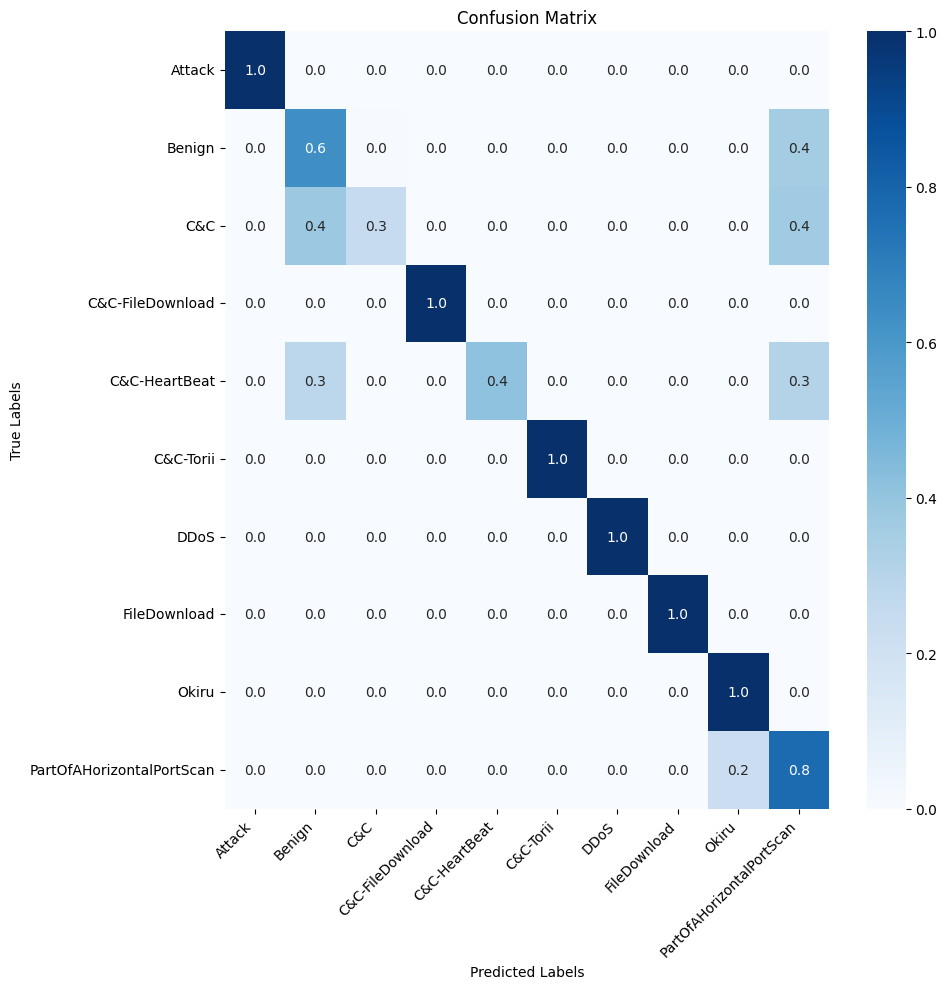

In [57]:
cm_prob = confusion_matrix(y_test, y_pred, normalize='true') 
# print(cm)
classes = ['Attack', 'Benign', 'C&C', 'C&C-FileDownload', 'C&C-HeartBeat',  
           'C&C-Torii', 'DDoS', 'FileDownload', 'Okiru', 'PartOfAHorizontalPortScan']


plt.figure(figsize=(10, 10))
sns.heatmap(cm_prob, annot=True, fmt='0.1f', cmap='Blues', xticklabels=classes, yticklabels=classes)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()



In [27]:
value_list = []

for i in y_test:
    value_list.append(i)

values_array = np.array(value_list)
print(classification_report(values_array, y_pred))

                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00       773
                   Benign       0.96      0.66      0.78     33131
                      C&C       0.57      0.12      0.20      3003
         C&C-FileDownload       0.86      1.00      0.92         6
            C&C-HeartBeat       0.89      0.83      0.86        58
                C&C-Torii       0.75      0.38      0.50         8
                     DDoS       1.00      1.00      1.00     42786
             FileDownload       1.00      1.00      1.00         3
                    Okiru       0.50      1.00      0.67     20004
PartOfAHorizontalPortScan       0.84      0.78      0.81     89166

                 accuracy                           0.82    188938
                macro avg       0.84      0.78      0.77    188938
             weighted avg       0.86      0.82      0.82    188938

